In [1]:
import pandas as pd
import numpy as np

In [2]:
numerical = pd.read_csv('numerical.csv')
categorical = pd.read_csv('categorical.csv')
targets = pd.read_csv('target.csv')
data = pd.concat([numerical, categorical, targets], axis = 1)

In [3]:
data.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,...,92,8,94,2,95,12,89,11,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,...,93,10,95,12,95,12,93,10,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,...,91,11,92,7,95,12,90,1,0,0.0
3,0,70.000000,1,4,2,0,23,14,31,3,...,87,11,94,11,95,12,87,2,0,0.0
4,0,78.000000,3,2,60,1,28,9,53,26,...,93,10,96,1,96,1,79,3,0,0.0


In [4]:
categorical.dtypes

STATE           object
CLUSTER          int64
HOMEOWNR        object
GENDER          object
DATASRCE         int64
RFA_2R          object
RFA_2A          object
GEOCODE2        object
DOMAIN_A        object
DOMAIN_B         int64
ODATEW_YR        int64
ODATEW_MM        int64
DOB_YR           int64
DOB_MM           int64
MINRDATE_YR      int64
MINRDATE_MM      int64
MAXRDATE_YR      int64
MAXRDATE_MM      int64
LASTDATE_YR      int64
LASTDATE_MM      int64
FIRSTDATE_YR     int64
FIRSTDATE_MM     int64
dtype: object

In [5]:
y = data['TARGET_B']
X = data.drop(columns=['TARGET_B','TARGET_D'])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Split into numerical and categorical

#### Numerical

In [7]:
X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

# Reset index to concat with categorical after encoding

#X_train_num = X_train_num.reset_index(drop=True)
#X_test_num = X_test_num.reset_index(drop=True)

In [8]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X_train_num)
X_train_scaled = transformer.transform(X_train_num)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_num.columns)
X_test_scaled  = transformer.transform(X_test_num)
X_test_scaled  = pd.DataFrame(X_test_scaled, columns=X_test_num.columns)

#### Categorical

In [9]:
X_train_cat = X_train.select_dtypes(object)
X_test_cat = X_test.select_dtypes(object)

#### OneHot Encode the categorical columns

In [10]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
X_train_encode = encoder.transform(X_train_cat).toarray()
X_train_encode = pd.DataFrame(X_train_encode, columns=encoder.get_feature_names_out())
# we encode the test also but don't fit the encoder again
X_test_encode = encoder.transform(X_test_cat).toarray()
X_test_encode = pd.DataFrame(X_test_encode, columns=encoder.get_feature_names_out())

#### Concat the numerical and encoded categoricals

In [11]:
X_train_treated = pd.concat([X_train_scaled, X_train_encode], axis = 1)
X_test_treated  = pd.concat([X_test_scaled,  X_test_encode],  axis = 1)

In [12]:
print(X_train_treated.isna().sum().sum())
print(X_test_treated.isna().sum().sum())

0
0


#### Oversampling the Train data

In [13]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_resampled_oversample, y_resampled_oversample = ros.fit_resample(X_train_treated, y_train)

In [14]:
X_resampled = pd.DataFrame(X_resampled_oversample, columns=X_resampled_oversample.columns)

In [15]:
X_resampled.head()


,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.752577,0.666667,1.000000,0.000000,0.000000,0.333333,0.212121,0.404040,0.060606,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.659794,0.500000,0.555556,0.004149,0.010101,0.262626,0.333333,0.272727,0.101010,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.624862,0.666667,1.000000,0.000000,0.141414,0.363636,0.414141,0.191919,0.080808,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.624862,0.666667,1.000000,0.000000,0.000000,0.353535,0.252525,0.525253,0.121212,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.577320,0.500000,1.000000,0.000000,0.000000,0.242424,0.373737,0.242424,0.060606,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
# Rename for ease of use

X_train = X_resampled
X_test = X_test_treated
y_train = y_resampled_oversample

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8, # fraction of X-train to use in each tree
                             random_state=42)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.6206303843605037
0.6137923806529372


### Trying KBest to reduce the features

In [18]:
%%time
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


kbest = SelectKBest(chi2, k=10)
selector = kbest.fit(X_train, y_train)

X_train_new = selector.transform(X_train)
X_test_new = selector.transform(X_test)

CPU times: user 508 ms, sys: 95.1 ms, total: 604 ms
Wall time: 607 ms


In [19]:
df = pd.DataFrame(data = selector.scores_, columns = ['score'])
df['Column'] = X_train.columns
print(df.sort_values(by = ['score'], ascending = False).head(10))

           score       Column
313  1453.378377       RFA_2F
346   913.652382     RFA_2A_G
344   677.066501     RFA_2A_E
345   403.919723     RFA_2A_F
326   326.734012  LASTDATE_YR
111   199.311691         HVP2
110   197.881763         HVP1
305   179.618400     CARDGIFT
112   175.448363         HVP3
115   150.873602         HVP6


In [20]:
cols = df.sort_values(by = ['score'], ascending = False).head(10)['Column']
cols

313         RFA_2F
346       RFA_2A_G
344       RFA_2A_E
345       RFA_2A_F
326    LASTDATE_YR
111           HVP2
110           HVP1
305       CARDGIFT
112           HVP3
115           HVP6
Name: Column, dtype: object

In [21]:
X_train_B = pd.DataFrame(X_train_new)
X_train_B.head()
X_train_B.columns = cols
X_train_B

Column,RFA_2F,RFA_2A_G,RFA_2A_E,RFA_2A_F,LASTDATE_YR,HVP2,HVP1,CARDGIFT,HVP3,HVP6
0,0.101010,0.191919,0.313131,0.040404,0.195122,0.000000,0.5,0.0,0.0,1.0
1,0.000000,0.020202,0.060606,0.000000,0.024390,0.000000,0.0,0.0,0.0,1.0
2,0.000000,0.010101,0.040404,0.000000,0.170732,0.333333,0.5,1.0,0.0,0.0
3,0.010101,0.030303,0.121212,0.000000,0.024390,0.000000,0.0,0.0,0.0,1.0
4,0.000000,0.010101,0.020202,0.000000,0.073171,1.000000,0.5,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
144859,0.010101,0.040404,0.424242,0.000000,0.024390,0.000000,0.0,0.0,1.0,0.0
144860,0.040404,0.141414,0.323232,0.000000,0.073171,0.000000,1.0,0.0,0.0,1.0
144861,0.040404,0.090909,0.303030,0.010101,0.073171,0.666667,0.5,1.0,0.0,0.0
144862,0.000000,0.020202,0.080808,0.000000,0.097561,0.000000,0.0,0.0,1.0,0.0


In [22]:
X_test_B = pd.DataFrame(X_test_new)
X_test_B.head()
X_test_B.columns = cols
X_test_B

Column,RFA_2F,RFA_2A_G,RFA_2A_E,RFA_2A_F,LASTDATE_YR,HVP2,HVP1,CARDGIFT,HVP3,HVP6
0,0.111111,0.666667,0.979798,0.000000,0.146341,1.000000,0.0,0.0,1.0,0.0
1,0.121212,0.171717,0.535354,0.060606,0.195122,0.000000,0.5,0.0,0.0,1.0
2,0.000000,0.000000,0.494949,0.000000,0.024390,0.000000,0.0,0.0,1.0,0.0
3,0.222222,0.484848,0.858586,0.111111,0.317073,0.000000,0.0,0.0,1.0,0.0
4,0.020202,0.030303,0.050505,0.010101,0.073171,0.666667,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
19078,0.020202,0.030303,0.151515,0.000000,0.073171,0.333333,0.5,0.0,1.0,0.0
19079,0.000000,0.000000,0.000000,0.000000,0.024390,0.000000,0.0,0.0,1.0,0.0
19080,0.000000,0.020202,0.121212,0.000000,0.073171,0.000000,0.0,0.0,1.0,0.0
19081,0.000000,0.010101,0.070707,0.000000,0.146341,0.333333,0.5,1.0,0.0,0.0


In [23]:
clf = RandomForestClassifier(max_depth=5, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8, # fraction of X-train to use in each tree
                             random_state=42)
clf.fit(X_train_B, y_train)
print(clf.score(X_train_B, y_train))
print(clf.score(X_test_B, y_test))

0.6027929644356086
0.6143164072734895


On first Glance it looks like the reduction of features decreased the quality of the model.
- But the parameters of the random forest needs to be optimized after the reduction of features

In [24]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test_B)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0    18137
1      946
Name: TARGET_B, dtype: int64

array([[11203,  6934],
       [  426,   520]])

In [25]:
cost_FP = 8401*.68
cost_FN = 471*15

print(f'cost of sending mail to non donors is {cost_FP}')
print(f'cost of missing donors is {cost_FN}')

cost of sending mail to non donors is 5712.68
cost of missing donors is 7065


In this case the cost of missing donors is higher than sending mails to non donors
- We could optimize the recall to decrease the number of missed donors

### Optimize the max_depth

In [26]:
max_depth = range(1,20)
test = []
train = []

for depth in max_depth:
    model = RandomForestClassifier(max_depth=depth, random_state=0)
    model.fit(X_train_new, y_train)
    test.append(model.score(X_test_new,y_test))
    train.append(model.score(X_train_new,y_train))

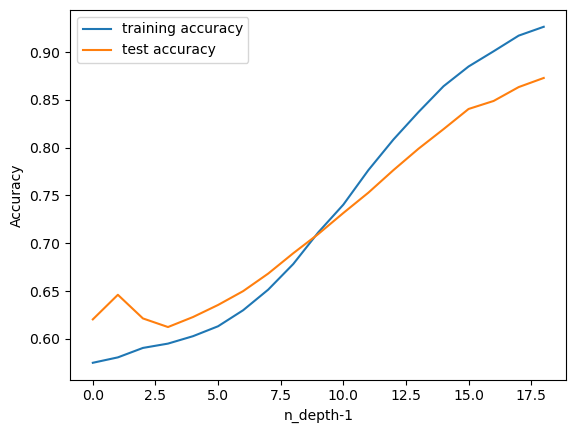

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot( train, label="training accuracy")
plt.plot( test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_depth-1")
plt.legend()

Try 6 max depth

### Check the recall score and try to optimize it

In [28]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=6,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8
                            )
cross_val_scores = cross_val_score(clf, X_train_B, y_train, cv=10)
print(np.mean(cross_val_scores))

0.6113320386716238


In [29]:
cross_val_score(clf, X_train_B, y_train, cv=5, scoring='recall')

array([0.58256247, 0.5888444 , 0.60474909, 0.58880376, 0.5950573 ])

In [30]:
np.mean([0.58337935, 0.59707364, 0.61236886, 0.58738266, 0.59835726])

0.595712354

In [31]:
clf.fit(X_train_B, y_train)
y_pred = clf.predict(X_test_B)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0    18137
1      946
Name: TARGET_B, dtype: int64

array([[11581,  6556],
       [  446,   500]])

Random Grid took around 45 min

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

max_depth_choices = [3,4,5,6,7,8,9,10,None] # reduce options
min_samples_split_choices = [2,3,4,5,6,7,8,9,10]
min_samples_leaf_choices = [2,3,4,5,6,7,8,9,10]
max_samples_choices = [0.9, 0.8, 0.7, 0.6, 0.5]

random_grid = {
    'max_depth': max_depth_choices,
    'min_samples_split': min_samples_split_choices,
    'min_samples_leaf': min_samples_leaf_choices,
    'max_samples': max_samples_choices
}

model = RandomForestClassifier()

random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=random_grid,
                                   n_iter=100,
                                   scoring='recall',  # Added scoring for recall
                                   cv=5,
                                   n_jobs=10,
                                   verbose=2)  # Added verbose to check steps

random_search.fit(X_train_B, y_train)

#Best hyperparameters
print("Best Parameters:", random_search.best_params_)

#Best score
print("Best Score:", random_search.best_score_)

#Best estimator
print("Best Estimator:", random_search.best_estimator_)


pd.set_option('display.max_colwidth', None)

#Convert cv results to DataFrame
results_df = pd.DataFrame(random_search.cv_results_)

#Sort by the mean test score in descending order and get top 5
top5 = results_df.sort_values(by='mean_test_score', ascending=False).head(10)

#Display the top 5 hyperparameter combinations
print(top5[['params', 'mean_test_score']])


In [32]:
clf = RandomForestClassifier(max_depth= 5, # max number of questions to ask
                             min_samples_split=3, # amount of rows still considered at every question
                             min_samples_leaf =7, # ultimate answer based on at least this many rows
                             max_samples=0.7, # fraction of X-train to use in each tree
                             criterion='entropy',
                             class_weight='balanced')
clf.fit(X_train_B, y_train)
print(clf.score(X_train_B, y_train))
print(clf.score(X_test_B, y_test))

0.6039595758780649
0.6165173190798092


In [33]:
from sklearn.metrics import recall_score

y_train_pred = clf.predict(X_train_B)
y_test_pred = clf.predict(X_test_B)

# Calculate and print recall scores
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

print("Recall score train:", train_recall)
print("Recall score test:", test_recall)

Recall score train: 0.5914789043516677
Recall score test: 0.5486257928118393


y_pred = clf.predict(X_test_B)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

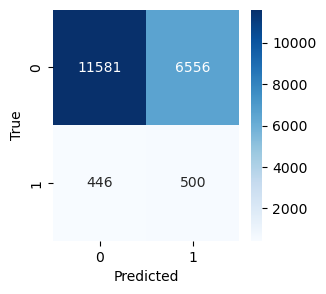

In [34]:
# Different view for the correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(3,3))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### On the original data set run the encoder and scaler and predict the donors using the model

#### Scale and Encode all data

In [35]:
X_num = X.select_dtypes(np.number)

X_scaled = transformer.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, columns=X_num.columns)


In [36]:
X_cat = X.select_dtypes(object)
X_encode = encoder.transform(X_cat).toarray()
X_encode = pd.DataFrame(X_encode, columns=encoder.get_feature_names_out())

In [37]:
X_treated = pd.concat([X_scaled, X_encode], axis = 1)

In [38]:
X_treated.isna().sum().sum()

0

#### run the Kbest to select features

In [39]:
X_new = selector.transform(X_treated)

In [40]:
df = pd.DataFrame(data = selector.scores_, columns = ['score'])
df['Column'] = X_treated.columns
print(df.sort_values(by = ['score'], ascending = False).head(10))

           score       Column
313  1453.378377       RFA_2F
346   913.652382     RFA_2A_G
344   677.066501     RFA_2A_E
345   403.919723     RFA_2A_F
326   326.734012  LASTDATE_YR
111   199.311691         HVP2
110   197.881763         HVP1
305   179.618400     CARDGIFT
112   175.448363         HVP3
115   150.873602         HVP6


In [41]:
cols = df.sort_values(by = ['score'], ascending = False).head(10)['Column']
cols

313         RFA_2F
346       RFA_2A_G
344       RFA_2A_E
345       RFA_2A_F
326    LASTDATE_YR
111           HVP2
110           HVP1
305       CARDGIFT
112           HVP3
115           HVP6
Name: Column, dtype: object

In [42]:
X_B = pd.DataFrame(X_new)
X_B.columns = cols
X_B

Column,RFA_2F,RFA_2A_G,RFA_2A_E,RFA_2A_F,LASTDATE_YR,HVP2,HVP1,CARDGIFT,HVP3,HVP6
0,0.020202,0.070707,0.131313,0.000000,0.341463,1.000000,0.0,1.0,0.0,0.0
1,0.979798,0.989899,0.989899,0.949495,0.024390,0.333333,0.0,0.0,0.0,1.0
2,0.000000,0.010101,0.060606,0.000000,0.341463,1.000000,0.0,1.0,0.0,0.0
3,0.101010,0.252525,0.505051,0.101010,0.170732,1.000000,0.0,1.0,0.0,0.0
4,0.000000,0.010101,0.020202,0.000000,0.195122,0.333333,0.5,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
95407,0.020202,0.101010,0.494949,0.000000,0.000000,0.000000,0.5,0.0,0.0,1.0
95408,0.181818,0.717172,0.888889,0.050505,0.000000,0.000000,0.5,0.0,1.0,0.0
95409,0.000000,0.000000,0.000000,0.000000,0.097561,0.666667,0.5,1.0,0.0,0.0
95410,0.898990,0.969697,1.000000,0.090909,0.439024,1.000000,1.0,0.0,1.0,0.0


#### Run the model on all data to predict the number of Donors

In [43]:
clf = RandomForestClassifier(max_depth= 5, # max number of questions to ask
                             min_samples_split=3, # amount of rows still considered at every question
                             min_samples_leaf =7, # ultimate answer based on at least this many rows
                             max_samples=0.7, # fraction of X-train to use in each tree
                             criterion='entropy',
                             class_weight='balanced')
clf.fit(X_B, y)
print(clf.score(X_B, y))

0.613717352115038


In [44]:
y_pred = clf.predict(X_B)

# Calculate and print recall scores
train_recall = recall_score(y, y_pred)

print("Recall score:", train_recall)

Recall score: 0.5855874457980591


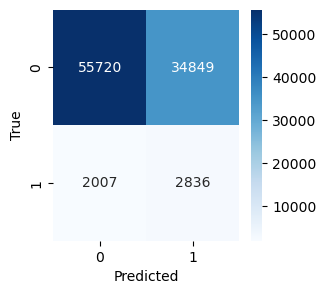

In [45]:
matrix = confusion_matrix(y, y_pred)

plt.figure(figsize=(3,3))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Add the predicitions to the df to be able to filter later using the predicted donors

In [46]:
X_B['Predictions'] = y_pred


In [47]:
X_B

Column,RFA_2F,RFA_2A_G,RFA_2A_E,RFA_2A_F,LASTDATE_YR,HVP2,HVP1,CARDGIFT,HVP3,HVP6,Predictions
0,0.020202,0.070707,0.131313,0.000000,0.341463,1.000000,0.0,1.0,0.0,0.0,1
1,0.979798,0.989899,0.989899,0.949495,0.024390,0.333333,0.0,0.0,0.0,1.0,0
2,0.000000,0.010101,0.060606,0.000000,0.341463,1.000000,0.0,1.0,0.0,0.0,1
3,0.101010,0.252525,0.505051,0.101010,0.170732,1.000000,0.0,1.0,0.0,0.0,1
4,0.000000,0.010101,0.020202,0.000000,0.195122,0.333333,0.5,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
95407,0.020202,0.101010,0.494949,0.000000,0.000000,0.000000,0.5,0.0,0.0,1.0,0
95408,0.181818,0.717172,0.888889,0.050505,0.000000,0.000000,0.5,0.0,1.0,0.0,0
95409,0.000000,0.000000,0.000000,0.000000,0.097561,0.666667,0.5,1.0,0.0,0.0,1
95410,0.898990,0.969697,1.000000,0.090909,0.439024,1.000000,1.0,0.0,1.0,0.0,1


#### Save data set to csv

In [48]:
X_B.to_csv('Data_Predictions.csv')

## Build a regression model for Target_D

In [49]:
df_D = data[data['TARGET_B']==1]

In [50]:
df_D

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
20,2,62.000000,3,8,10,2,25,40,27,11,...,88,1,94,4,96,3,87,1,1,4.0
30,0,61.611649,5,9,0,1,37,58,16,8,...,90,4,93,1,95,12,90,4,1,7.0
45,0,66.000000,5,9,5,0,33,24,39,6,...,93,12,94,4,96,2,87,4,1,5.0
78,0,69.000000,6,9,0,0,34,20,54,2,...,90,1,95,3,95,11,90,1,1,13.0
93,1,73.000000,1,7,10,0,21,53,8,5,...,92,9,95,9,95,9,92,9,1,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95298,2,45.000000,5,9,0,0,45,28,37,9,...,89,6,96,1,96,1,86,8,1,20.0
95309,0,51.000000,5,6,1,1,32,43,24,7,...,93,10,94,2,95,12,93,10,1,15.0
95398,0,86.000000,5,9,0,1,32,21,26,9,...,89,6,95,11,96,2,87,11,1,3.0
95403,0,58.000000,4,9,0,0,24,46,20,6,...,90,3,93,12,96,1,90,3,1,10.0


In [51]:
y = df_D['TARGET_D']
X = df_D.drop(columns=['TARGET_B','TARGET_D'])

In [52]:
X

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
20,2,62.000000,3,8,10,2,25,40,27,11,...,36,1,88,1,94,4,96,3,87,1
30,0,61.611649,5,9,0,1,37,58,16,8,...,0,2,90,4,93,1,95,12,90,4
45,0,66.000000,5,9,5,0,33,24,39,6,...,31,10,93,12,94,4,96,2,87,4
78,0,69.000000,6,9,0,0,34,20,54,2,...,28,7,90,1,95,3,95,11,90,1
93,1,73.000000,1,7,10,0,21,53,8,5,...,24,10,92,9,95,9,95,9,92,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95298,2,45.000000,5,9,0,0,45,28,37,9,...,53,4,89,6,96,1,96,1,86,8
95309,0,51.000000,5,6,1,1,32,43,24,7,...,47,1,93,10,94,2,95,12,93,10
95398,0,86.000000,5,9,0,1,32,21,26,9,...,11,10,89,6,95,11,96,2,87,11
95403,0,58.000000,4,9,0,0,24,46,20,6,...,40,1,90,3,93,12,96,1,90,3


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### numerical columns to be scaled

In [54]:
X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

In [55]:
X_train_scaled = transformer.transform(X_train_num)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_num.columns)
X_test_scaled  = transformer.transform(X_test_num)
X_test_scaled  = pd.DataFrame(X_test_scaled, columns=X_test_num.columns)

In [56]:
#X_train_scaled

#### Categorical columns to be encoded

In [57]:
X_train_cat = X_train.select_dtypes(object)
X_test_cat = X_test.select_dtypes(object)

In [58]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
X_train_encode = encoder.transform(X_train_cat).toarray()
X_train_encode = pd.DataFrame(X_train_encode, columns=encoder.get_feature_names_out())

X_test_encode = encoder.transform(X_test_cat).toarray()
X_test_encode = pd.DataFrame(X_test_encode, columns=encoder.get_feature_names_out())

In [59]:
#X_train_encode

In [60]:
X_train_treated = pd.concat([X_train_scaled, X_train_encode], axis = 1)
X_test_treated  = pd.concat([X_test_scaled,  X_test_encode],  axis = 1)

In [61]:
print(X_train_treated.isna().sum().sum())
print(X_test_treated.isna().sum().sum())

0
0


#### Use KBest that was done in the classifier

In [62]:
X_train_new1 = selector.transform(X_train_treated)
X_test_new1 = selector.transform(X_test_treated)

In [63]:
df = pd.DataFrame(data = selector.scores_, columns = ['score'])
df['Column'] = X_train_treated.columns
print(df.sort_values(by = ['score'], ascending = False).head(10))

           score       Column
313  1453.378377       RFA_2F
346   913.652382     RFA_2A_G
344   677.066501     RFA_2A_E
345   403.919723     RFA_2A_F
326   326.734012  LASTDATE_YR
111   199.311691         HVP2
110   197.881763         HVP1
305   179.618400     CARDGIFT
112   175.448363         HVP3
115   150.873602         HVP6


In [64]:
cols = df.sort_values(by = ['score'], ascending = False).head(10)['Column']

In [65]:
X_train_D = pd.DataFrame(X_train_new1)
X_train_D.columns = cols
X_train_D

Column,RFA_2F,RFA_2A_G,RFA_2A_E,RFA_2A_F,LASTDATE_YR,HVP2,HVP1,CARDGIFT,HVP3,HVP6
0,0.010101,0.030303,0.141414,0.000000,0.024390,0.000000,0.0,0.0,1.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.146341,1.000000,0.0,0.0,0.0,0.0
2,0.030303,0.080808,0.434343,0.000000,0.146341,0.000000,0.0,0.0,1.0,0.0
3,0.545455,0.727273,0.929293,0.303030,0.243902,0.666667,0.0,0.0,0.0,0.0
4,0.333333,0.696970,0.858586,0.000000,0.073171,0.666667,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3869,0.000000,0.000000,0.000000,0.000000,0.243902,0.333333,0.0,1.0,0.0,0.0
3870,0.000000,0.000000,0.010101,0.000000,0.341463,1.000000,0.5,1.0,0.0,0.0
3871,0.131313,0.161616,0.202020,0.070707,0.048780,0.666667,0.5,1.0,0.0,0.0
3872,0.010101,0.030303,0.212121,0.010101,0.170732,1.000000,0.0,1.0,0.0,0.0


In [66]:
X_test_D = pd.DataFrame(X_test_new1)
X_test_D.columns = cols
X_test_D

Column,RFA_2F,RFA_2A_G,RFA_2A_E,RFA_2A_F,LASTDATE_YR,HVP2,HVP1,CARDGIFT,HVP3,HVP6
0,0.020202,0.050505,0.343434,0.010101,0.439024,1.000000,0.5,0.0,1.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.317073,0.333333,0.0,1.0,0.0,0.0
2,0.707071,1.000000,1.000000,0.050505,0.024390,0.000000,0.0,0.0,1.0,0.0
3,0.030303,0.404040,0.909091,0.000000,0.024390,0.666667,0.5,1.0,0.0,0.0
4,0.686869,0.808081,0.939394,0.565657,0.146341,0.333333,0.5,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
964,0.020202,0.080808,0.282828,0.010101,0.024390,0.000000,0.0,0.0,0.0,1.0
965,0.000000,0.010101,0.090909,0.000000,0.243902,0.666667,0.0,0.0,0.0,0.0
966,0.000000,0.000000,0.000000,0.000000,0.292683,0.333333,0.0,0.0,1.0,0.0
967,0.000000,0.000000,0.020202,0.000000,0.121951,0.333333,0.0,0.0,1.0,0.0


### Try 3 different regression model to choose the best to continue with

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


linear_model = LinearRegression()
rforest_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)
KN_model = KNeighborsRegressor()


model_pipeline = [linear_model, rforest_model, KN_model]
model_names = ['Linear Regression', 'Random Forest Regressor', 'KNeighbors Regressor']
scores = {}

for model, model_name in zip(model_pipeline, model_names):
    mean_score = np.mean(cross_val_score(model, X_train_D, y_train, cv=10, scoring='r2'))
    scores[model_name] = mean_score

print(scores)

{'Linear Regression': 0.36925277254459343, 'Random Forest Regressor': 0.2666271831638203, 'KNeighbors Regressor': 0.2367531720647193}


### Choose the best model for predictions

In [76]:
linear_model = LinearRegression()

In [77]:
linear_model.fit(X_train_D, y_train)

LinearRegression()

In [78]:
y_train_pred = linear_model.predict(X_train_D)
y_test_pred = linear_model.predict(X_test_D)


In [81]:
from sklearn.metrics import mean_squared_error, r2_score

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(train_r2)
print(test_r2)

0.35844566051326
0.45930569987742587


### Filter the predicted Data set with only donors to be able to predict the amount each donor will give

In [74]:
 filtered_data= X_B[X_B['Predictions']==1]

In [82]:
 filtered_data = filtered_data.drop(columns='Predictions')

In [83]:
filtered_data.head()

Column,RFA_2F,RFA_2A_G,RFA_2A_E,RFA_2A_F,LASTDATE_YR,HVP2,HVP1,CARDGIFT,HVP3,HVP6
0,0.020202,0.070707,0.131313,0.00000,0.341463,1.000000,0.0,1.0,0.0,0.0
2,0.000000,0.010101,0.060606,0.00000,0.341463,1.000000,0.0,1.0,0.0,0.0
3,0.101010,0.252525,0.505051,0.10101,0.170732,1.000000,0.0,1.0,0.0,0.0
4,0.000000,0.010101,0.020202,0.00000,0.195122,0.333333,0.5,0.0,1.0,0.0
7,0.010101,0.060606,0.181818,0.00000,0.097561,0.666667,0.0,1.0,0.0,0.0


In [84]:
pred_donation = linear_model.predict( filtered_data)

In [86]:
filtered_data['Predicted_Donations'] = pred_donation

In [87]:
filtered_data

Column,RFA_2F,RFA_2A_G,RFA_2A_E,RFA_2A_F,LASTDATE_YR,HVP2,HVP1,CARDGIFT,HVP3,HVP6,Predicted_Donations
0,0.020202,0.070707,0.131313,0.000000,0.341463,1.000000,0.0,1.0,0.0,0.0,8.446199
2,0.000000,0.010101,0.060606,0.000000,0.341463,1.000000,0.0,1.0,0.0,0.0,8.437598
3,0.101010,0.252525,0.505051,0.101010,0.170732,1.000000,0.0,1.0,0.0,0.0,8.959190
4,0.000000,0.010101,0.020202,0.000000,0.195122,0.333333,0.5,0.0,1.0,0.0,16.590978
7,0.010101,0.060606,0.181818,0.000000,0.097561,0.666667,0.0,1.0,0.0,0.0,9.790839
...,...,...,...,...,...,...,...,...,...,...,...
95402,0.000000,0.000000,0.040404,0.000000,0.048780,0.666667,0.0,1.0,0.0,0.0,9.759649
95404,0.010101,0.020202,0.050505,0.000000,0.195122,1.000000,0.0,1.0,0.0,0.0,8.519095
95406,0.060606,0.101010,0.232323,0.000000,0.292683,1.000000,0.5,0.0,0.0,0.0,5.408861
95409,0.000000,0.000000,0.000000,0.000000,0.097561,0.666667,0.5,1.0,0.0,0.0,9.994082


### Calculating the sum of donations based on the predicted donors

In [107]:
donations=round(filtered_data['Predicted_Donations'].sum(),1)

In [98]:
donations

466316.7

#### Price of letters

In [96]:
cost = round(37685*0.68,1)

In [99]:
cost

25625.8

#### Subtracting the cost of letters from the collected donations 

In [108]:
predicted = round(donations-cost,1)

In [109]:
predicted

440690.9

### without optimizing

In [101]:
cost1 = len(data)*0.68

In [102]:
cost1

64880.16

In [105]:
donations1 = data['TARGET_D'].sum()

In [106]:
donations1

75668.7

In [112]:
actual = round(donations1 -cost1,1)

In [113]:
actual

10788.5

This shows the business will reduce the cost and collect more donations